In [1]:
import re
import numpy as np
import math
import tensorflow as tf

from matplotlib import pyplot as plt
%matplotlib inline
import sklearn.datasets
from sklearn import preprocessing, model_selection
from dataset import one_hot_encoded

/usr/local/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Data loading

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
cifar = unpickle('/home/AD/lbreston/Data/cifar-100-python/train')

X=np.array(cifar[b'data'])/255
cls =  np.array(cifar[b'coarse_labels'])

y=one_hot_encoded(class_numbers=cls, num_classes=20)

np.shape(y)

cifar = unpickle('/home/AD/lbreston/Data/cifar-100-python/test')

X_val=np.array(cifar[b'data'])/255
cls_val =  np.array(cifar[b'coarse_labels'])

y_val=one_hot_encoded(class_numbers=cls_val, num_classes=20)

np.shape(y_val)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.95, random_state=42, stratify=y)

In [4]:
X_train.shape

(2500, 3072)

In [5]:
X_test[1]

array([0.61176471, 0.59215686, 0.59215686, ..., 0.68235294, 0.65098039,
       0.6       ])

In [6]:
_, train_counts = np.unique(np.argmax(y_train,1), return_counts=True)
train_max = np.argmax(train_counts)
print(train_counts)
print(train_max)

[130 113 100 111 118 123 124 115 105 130 124 142 140 130 136 141 120 135
 125 138]
11


In [7]:
baseline_acc = np.mean(np.argmax(y_test,1) == train_max)
baseline_acc

0.04778947368421053

# Optimal Encoding

In [8]:
from noisy_networks import NMLP
from networks import MLP
from OptimalEncoding import OptimalEncoding

## Classification

In [9]:
n_in = X_train.shape[-1]
k = 500
n_out = y_train.shape[-1]

sigma=0
weight_sigma=.1

widths = [1000,5000,5000,1000,1000,1000,1000,1000,1000]
decode_widths=[100,100]

In [10]:
X_train.shape

(2500, 3072)

In [11]:
encoder = NMLP(n_in, k, widths,weight_sigma)
decoder = MLP(k, n_out, decode_widths)

In [12]:
oe = OptimalEncoding(encoder, decoder, k)

In [ ]:
oe.train(X_train, X_val, y_val,y=y_train,
         min_entropy=True, sigma = sigma, task = 'classification', 
         heteroskedastic = True, n_samples = 10,
         epochs=100, batch_size=100, lr=1e-5)

 99%|█████████▉| 99/100 [08:04<00:04,  4.83s/it]

In [ ]:
zhat_train = oe.encode(X_train, sigma=sigma)
plt.scatter(zhat_train[:,0], zhat_train[:,1], c = np.argmax(y_train,1), cmap=plt.get_cmap('Paired'))

In [ ]:
pred_train = oe.decode(zhat_train)
pred_train = np.argmax(pred_train,1)

true_train = np.argmax(y_train,1)

acc_train = np.mean(pred_train == true_train)
print('train acc = %.3f' %acc_train)

In [ ]:
zhat_test = oe.encode(X_test, sigma=sigma)
plt.scatter(zhat_test[:,0], zhat_test[:,1], c = np.argmax(y_test,1), cmap=plt.get_cmap('Paired'))

In [ ]:
pred_test = oe.decode(zhat_test)
pred_test = np.argmax(pred_test,1)

true_test = np.argmax(y_test,1)

acc_test = np.mean(pred_test == true_test)
print('test acc = %.3f' %acc_test)

In [ ]:
plt.scatter(zhat_test[:,0], zhat_test[:,1], c = pred_test, cmap=plt.get_cmap('Paired'))

In [ ]:
1/float(y.shape[-1])

# SubOptimal Encoding

In [20]:
n_in = X_train.shape[-1]
k = 500
n_out = y_train.shape[-1]

sigma=0
weight_sigma=.1

widths = [1000,5000,5000,1000,1000,1000,1000,1000,1000]
decode_widths=[100,100]

In [21]:
encoder = NMLP(n_in, k, widths, weight_sigma)
decoder = MLP(k, n_out, decode_widths)

In [22]:
oe = OptimalEncoding(encoder, decoder, k)

100%|██████████| 500/500 [04:09<00:00,  2.24it/s]


Sigma: 0.000000
Final task loss: -2.400469


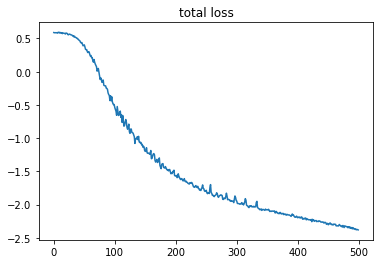

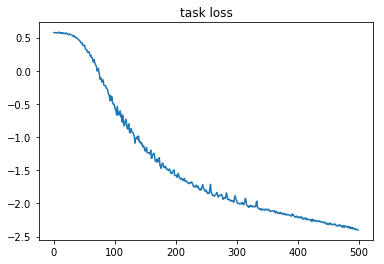

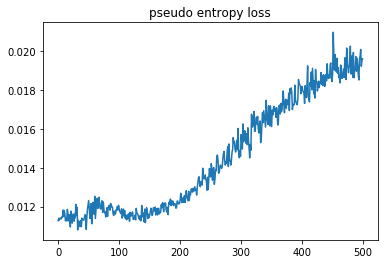

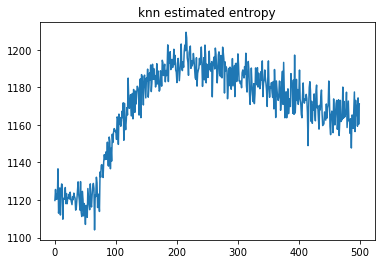

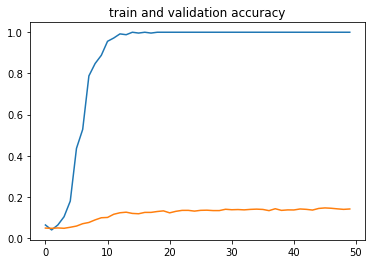

In [23]:
oe.train(X_train, X_val, y_val,y=y_train,
         min_entropy=False, sigma = sigma, task = 'classification', 
         heteroskedastic = True, n_samples = 10,
         epochs=500, batch_size=100, lr=1e-5)

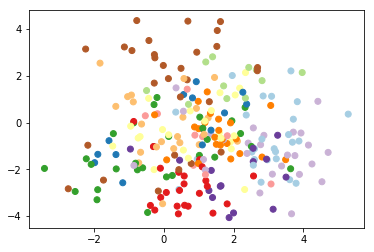

In [24]:
zhat_train = oe.encode(X_train, sigma=sigma)
plt.scatter(zhat_train[:,0], zhat_train[:,1], c = np.argmax(y_train,1), cmap=plt.get_cmap('Paired'))

In [25]:
pred_train = oe.decode(zhat_train)
pred_train = np.argmax(pred_train,1)

true_train = np.argmax(y_train,1)

acc_train = np.mean(pred_train == true_train)
print('train acc = %.3f' %acc_train)

train acc = 1.000


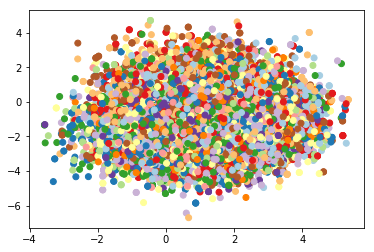

In [26]:
zhat_test = oe.encode(X_test, sigma=sigma)
plt.scatter(zhat_test[:,0], zhat_test[:,1], c = np.argmax(y_test,1), cmap=plt.get_cmap('Paired'))

In [27]:
pred_test = oe.decode(zhat_test)
pred_test = np.argmax(pred_test,1)

true_test = np.argmax(y_test,1)

acc_test = np.mean(pred_test == true_test)
print('test acc = %.3f' %acc_test)

test acc = 0.147


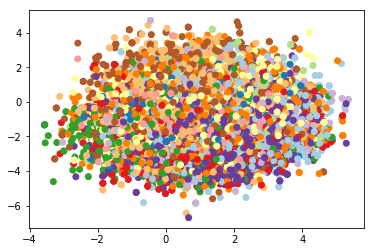

In [28]:
plt.scatter(zhat_test[:,0], zhat_test[:,1], c = pred_test, cmap=plt.get_cmap('Paired'))

In [29]:
1/float(y.shape[-1])

0.05